# Klasifikasi Risiko Diabetes Menggunakan hyperparameter pada klasifikasi Random Forest weight class pada Dataset Pima Indians Diabetes 

In [ ]:
# %pip install pandas numpy scikit-learn
# %pip install matplotlib
%pip install seaborn

## Ekploratori Data Analisis

In [4]:
import pandas as pd 
import numpy as np

df = pd.read_csv("diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### MIssing Value

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Duplikat

In [7]:
df.duplicated().sum()

np.int64(0)

### Deskripsi

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Penyebaran Data

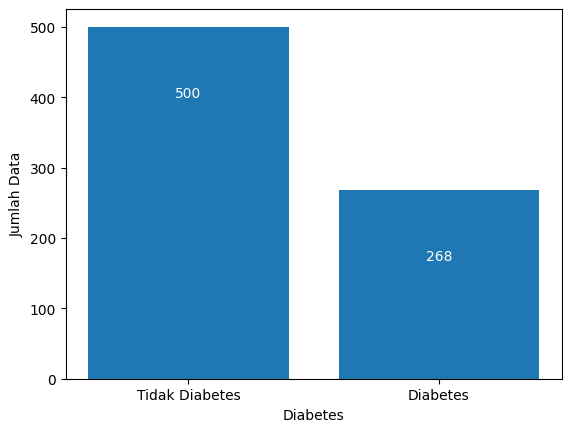

In [23]:
import matplotlib.pyplot as plt

jumlah = [df[df['Outcome'] == 0].count()['Outcome'], df[df['Outcome'] == 1].count()['Outcome']]

plt.bar(['Tidak Diabetes', 'Diabetes'], jumlah)

plt.xlabel('Diabetes')
plt.ylabel('Jumlah Data')

for i, v in enumerate(jumlah):
    plt.text(i, v - 100, str(v), color='white', horizontalalignment='center')


plt.show()

### Korelasi Data

#### Glukosa Vs Outcome

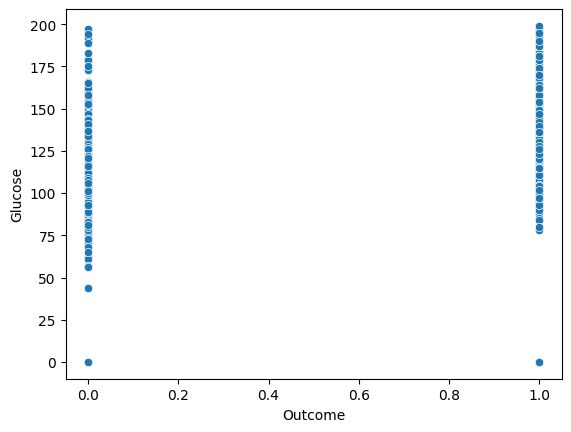

141.25746268656715
109.98


In [29]:
import seaborn as sns

sns.scatterplot(x='Outcome', y='Glucose', data=df)

plt.show()

rata_rata_gula_darah_diabetes = df[df['Outcome'] == 1]['Glucose'].mean()
rata_rata_gula_darah_tidak_diabetes = df[df['Outcome'] == 0]['Glucose'].mean()

print(rata_rata_gula_darah_diabetes)
print(rata_rata_gula_darah_tidak_diabetes)

#### Pregnancies Vs Outcome

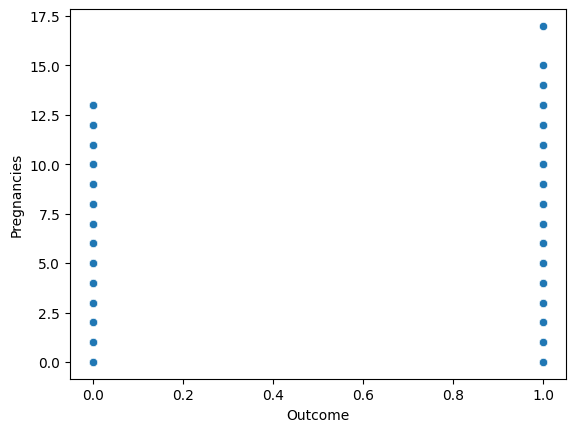

4.865671641791045
3.298


In [31]:
import seaborn as sns

sns.scatterplot(x='Outcome', y='Pregnancies', data=df)

plt.show()

rata_rata_kehamilan_diabetes = df[df['Outcome'] == 1]['Pregnancies'].mean()
rata_rata_kehamilan_tidak_diabetes = df[df['Outcome'] == 0]['Pregnancies'].mean()

print(rata_rata_kehamilan_diabetes)
print(rata_rata_kehamilan_tidak_diabetes)

## Preprocessing

## Modeling

## Evaluasi

## Prediksi